In [51]:
#Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
import os
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

font = {'weight' : 'bold',
        'size'   : 16}
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', **font)

## Data Preparation

In [79]:
#Loading Data

os.chdir('/Volumes/PtatoBasket/ACIML/Outputs/Sheets_of_ML/')
DATA=pd.read_excel(r'ML5.1-PremonM3C2.xlsx',sheet_name='Sheet1')


y=pd.Series(DATA.LWPG)
X=DATA.loc[:,~DATA.columns.isin(['LWP','LWPG','Unnamed: 0','Unnamed: 0.1','CloudRadius','LWP','CTP','CTT','COT'])]#Select Everything Other than LWP
# X=DATA.loc[:,DATA.columns.isin(['RH','MeanWind-850','AI','SMOKE-AOD','DUST-AOD','PrecipitableVapour','PBLH','WindDirection-850'])]#Select Everything Other than LWP

#Split dataset into training set and test set
X_train,X_test_whole,y_train,y_test_whole=train_test_split(X,y,test_size=0.3, random_state=42)#70% training and 30% test
X_testA,X_testB,y_testA,y_testB=train_test_split(X_test_whole,y_test_whole,test_size=0.5, random_state=42)#15% and 15%  for 2 fold verification


In [4]:
# %%script echo skipping
DATA.head()

,Unnamed: 0,PBLH,WindDirection-850,MeanWind-850,RH,V-850,SMOKE-AOD,DUST-AOD,AI,PrecipitableVapour,LTS,Nd,CloudRadius,LWP,CTP,CTT,COT,LWPG
0,1,1003.519739,287.963684,6.776600,48.865718,0.216081,0.188035,0.056755,0.272499,5.61750,14.056030,4.876295,15.8750,33.75,195.075003,212.932495,2.1775,A
1,4,1039.771802,288.574707,8.425652,61.552186,-0.165191,0.361265,0.081095,0.560568,4.02100,15.216766,8.161980,17.8775,106.75,388.150006,235.624995,3.0800,C
2,5,1050.669727,279.990936,8.447043,62.433701,-0.076336,0.350764,0.070256,0.558172,4.16825,15.121796,7.980946,17.9000,123.25,318.825005,228.722495,5.2375,C
3,6,974.982263,280.511658,7.027197,55.357529,0.007169,0.346779,0.068256,0.542644,4.26900,15.860077,6.579894,19.4200,101.50,299.925004,227.422495,5.3050,C
4,7,893.690588,285.210968,7.425883,42.288281,-0.072176,0.308349,0.062456,0.484868,4.05675,16.861389,5.259603,19.6775,41.75,357.850005,233.887495,1.9050,B


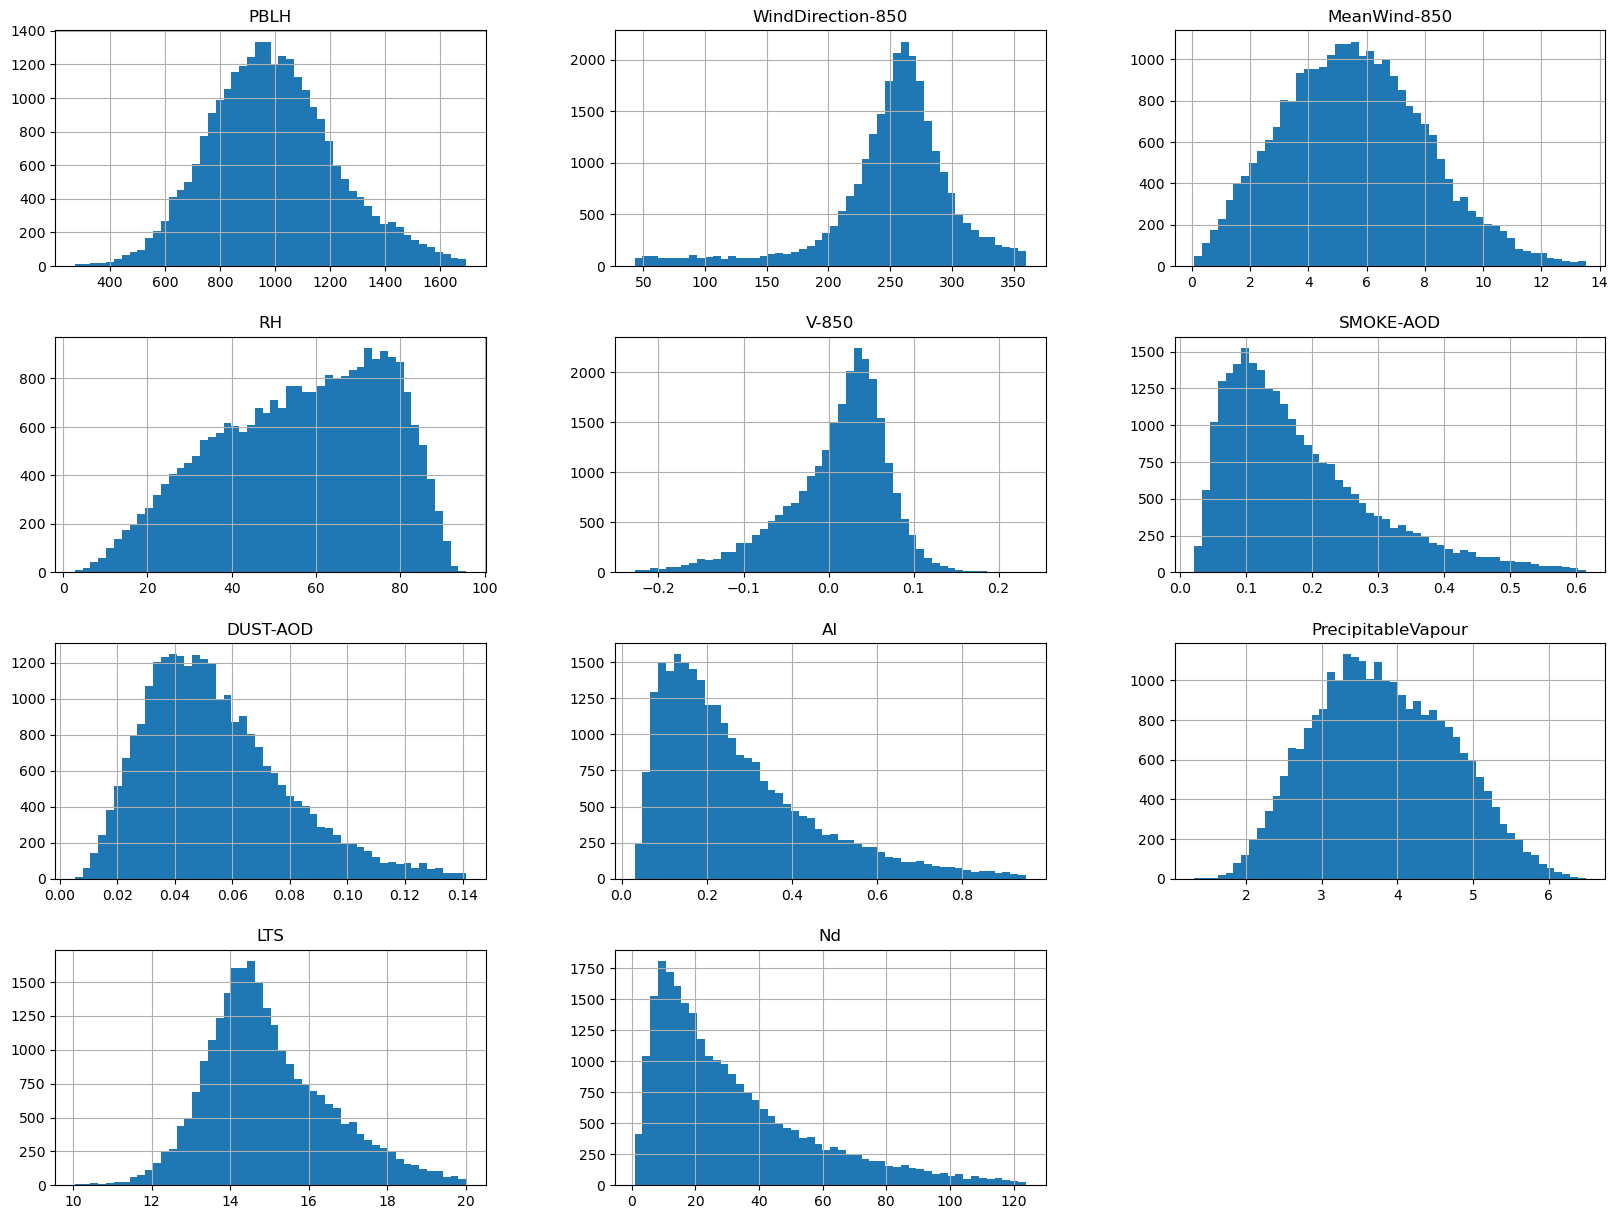

In [5]:
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

## Model training

### For GBRT

In [11]:
# %%script echo skipping
#Create gradientboost Regressor object
from sklearn.ensemble import GradientBoostingClassifier
myModel=GradientBoostingClassifier(max_depth=8,n_estimators=150,learning_rate=0.05)

### For RandomForest

In [4]:
#Create RandomForest Regressor objec
from sklearn.ensemble import RandomForestClassifier
myModel=RandomForestClassifier()

### to See the params

In [60]:
myModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Model Running

In [80]:
from sklearn import metrics
Mymodel=RandomForestClassifier(random_state = 52)
#Training
model=myModel.fit(X_train,y_train)
#Testing

y_pred=model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))

y_pred=model.predict(X_testA)
print(metrics.accuracy_score(y_testA, y_pred))

y_pred=model.predict(X_testB)
print(metrics.accuracy_score(y_testB, y_pred))


1.0
0.5322498730319959
0.5336379791825336


## Model Evalutation

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,f1_score


In [23]:
from sklearn import metrics
y_pred=model.predict(X_testA)
metrics.accuracy_score(y_testA, y_pred)

0.3496007821411113

In [ ]:
methods=['R-Squared', 'Adjusted R-Squared', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'RMSE']
values=[]

values.append(r2_score(y_testA,y_pred)) #1.R-Squared
values.append(1 - (1-model.score(X_testA, y_testA))*(len(y_testA)-1)/(len(y_testA)-X_testA.shape[1]-1))#2.Adjusted R-Squared
values.append(mean_absolute_error(y_testA, y_pred))#3.MAE
values.append(mean_squared_error(y_testA, y_pred))#4.MSE
values.append(np.sqrt(mean_squared_error(y_testA, y_pred)))#5.RMSE
# values.append(f1_score(y_test,y_pred))#6.F1 Score

eval_df = pd.DataFrame({'Method Name' : methods, 'Values': values})
eval_df

## Ploting the Importance

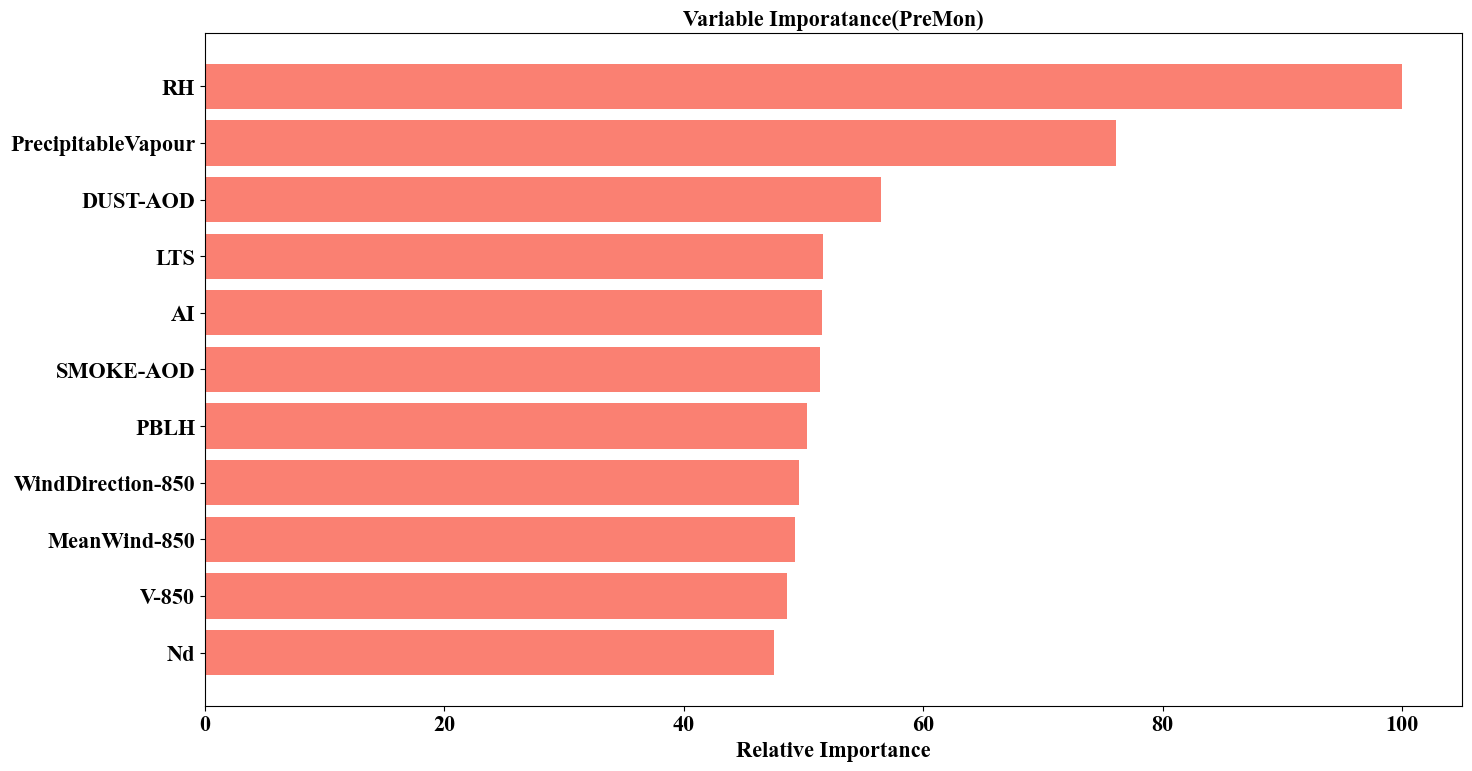

In [81]:
import matplotlib.pyplot as plt

#plot feature importance
feature_importance = model.feature_importances_

#make importances relative to mac importance
feature_importance=100.0 * (feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5

# lis=['R]
plt.barh(pos, feature_importance[sorted_idx],align='center',color='salmon')

plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance',**font)
plt.title('Variable Imporatance(PreMon)',**font)
plt.gcf().set_size_inches(15,8)
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)# plt.show()
os.chdir('/Volumes/PtatoBasket/ACIML/Outputs/ML_OUTS')
plt.savefig('VI-MC4p.png',dpi=300)


In [38]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_testA.iloc[:1000])


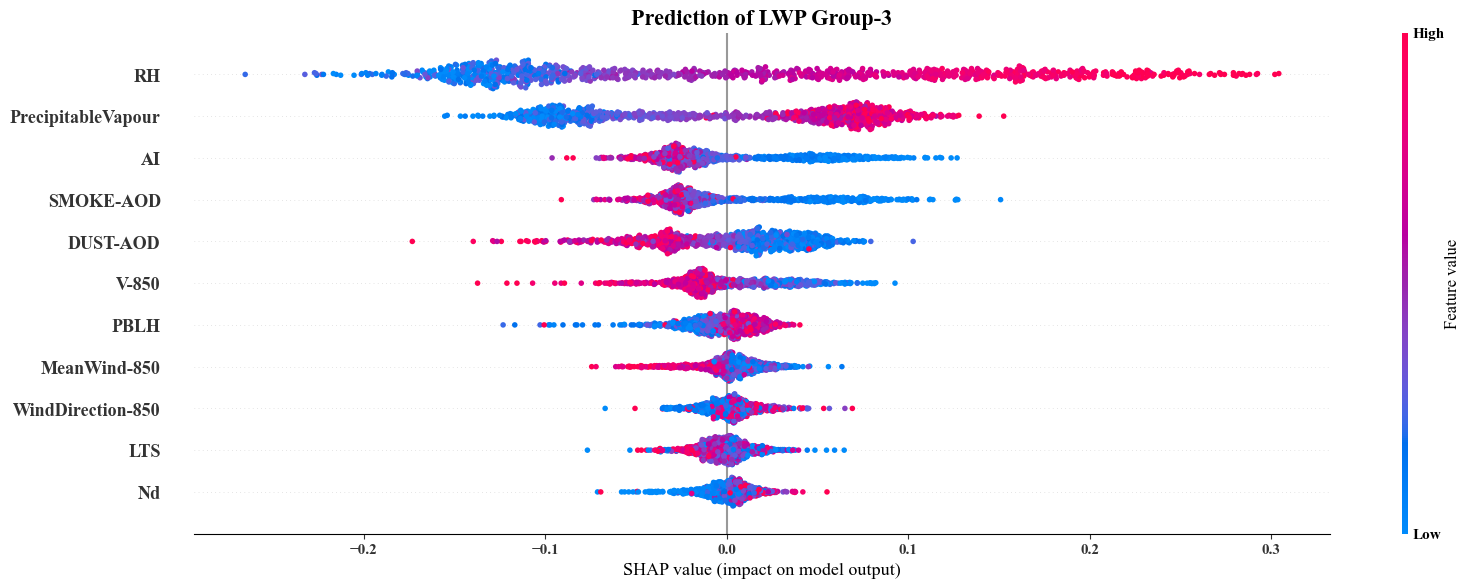

In [43]:

# row = 8
# shap.waterfall_plot(shap.Explanation(values=shap_values[2][row], 
#                                               base_values=explainer.expected_value[0], data=X_testA.iloc[row],  
#                                          feature_names=X_testA.columns.tolist()))

shap.summary_plot(shap_values[2], X_testA.iloc[:1000], show = False)
plt.gcf().set_size_inches(20,6)
plt.title("Prediction of LWP Group-3",**font)
os.chdir('/Volumes/PtatoBasket/ACIML/Outputs/ML_OUTS')
plt.savefig('C_SHAP-MC3p.png',dpi=300)



## Tuning hyperparameters

### For GBRT

In [51]:
# %%script echo skipping
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.15,0.10,0.05],'n_estimators':[100,150,200,250]}
tuning=GridSearchCV(estimator=myModel,
            param_grid=LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_


KeyboardInterrupt: 


Selected:
({'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 250},0.3665469426033763)


### For RandomForest

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [35]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
from sklearn.model_selection import RandomizedSearchCV
model = myModel
rf_RandomGrid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [60]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=33; total time=   1.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=33; total time=   1.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=33; total time=   1.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=33; total time=   1.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=33; total time=   1.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=33; total time=   1.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=33; total time=   1.4s

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8,
                                                      9, 10, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [61]:
params=rf_RandomGrid.best_params_
params

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

In [62]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test AccuracyA  - : {rf_RandomGrid.score(X_testA,y_testA):.3f}')
print (f'Test AccuracyB  - : {rf_RandomGrid.score(X_testB,y_testB):.3f}')

Train Accuracy - : 0.460
Test AccuracyA  - : 0.367
Test AccuracyB  - : 0.365


## Doing the validation with best params

In [15]:
params={'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}
#WithBestParams
myModel=RandomForestClassifier(random_state=42,
                        n_estimators=params['n_estimators'],
                        min_samples_split=params['min_samples_split'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_features=params['max_features'],
                        max_depth=params['max_depth'],bootstrap=True)

#Training
model=myModel.fit(X_train,y_train)
#Testing
y_pred=model.predict(X_testA)

In [17]:
y_pred=model.predict(X_testA)
metrics.accuracy_score(y_testA, y_pred)

0.4823798627002288

In [41]:
methods=['R-Squared', 'Adjusted R-Squared', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'RMSE']
values=[]

values.append(r2_score(y_testA,y_pred)) #1.R-Squared
values.append(1 - (1-model.score(X_testA, y_testA))*(len(y_testA)-1)/(len(y_testA)-X_testA.shape[1]-1))#2.Adjusted R-Squared
values.append(mean_absolute_error(y_testA, y_pred))#3.MAE
values.append(mean_squared_error(y_testA, y_pred))#4.MSE
values.append(np.sqrt(mean_squared_error(y_testA, y_pred)))#5.RMSE
# values.append(f1_score(y_test,y_pred))#6.F1 Score

eval_df = pd.DataFrame({'Method Name' : methods, 'Values': values})
eval_df

,Method Name,Values
0,R-Squared,0.384110
1,Adjusted R-Squared,0.380360
2,Mean Absolute Error (MAE),16.476579
3,Mean Squared Error (MSE),772.404308
4,RMSE,27.792163


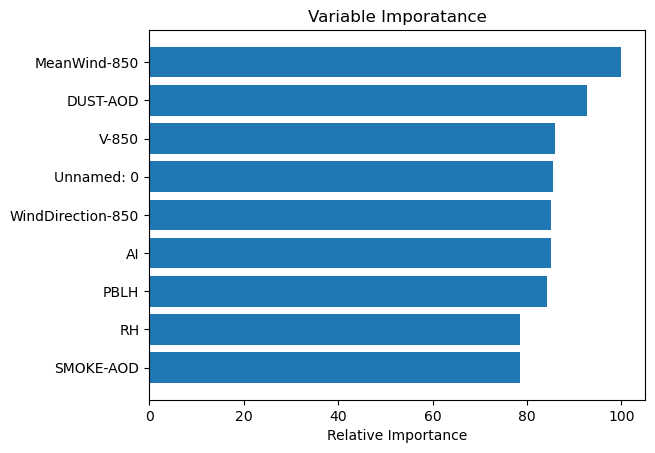

In [17]:
import matplotlib.pyplot as plt

#plot feature importance
feature_importance = model.feature_importances_

#make importances relative to mac importance
feature_importance=100.0 * (feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
plt.barh(pos, feature_importance[sorted_idx],align='center')
plt.yticks(pos, DATA.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Imporatance')
plt.show()

In [5]:
# Number of trees in random forest
n_estimators = [100, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
rf_RandomGrid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1)
rf_RandomGrid.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; tota

/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s


/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.1s


/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s


/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s


/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Volumes/ACIML/ProgramFiles/Anaconda/anaconda3/envs/CLIMATE_SCIENCE/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=2, max_features=

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   verbose=2)

In [6]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test AccuracyA  - : {rf_RandomGrid.score(X_testA,y_testA):.3f}')
print (f'Test AccuracyB  - : {rf_RandomGrid.score(X_testB,y_testB):.3f}')

Train Accuracy - : 0.489
Test AccuracyA  - : 0.487
Test AccuracyB  - : 0.474


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 200, 300]
}

# Create a based model

rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_



{'n_estimators': 300}

In [50]:
print (f'Train Accuracy - : {grid_search.score(X_train,y_train):.3f}')
print (f'Test AccuracyA  - : {grid_search.score(X_testA,y_testA):.3f}')
print (f'Test AccuracyB  - : {grid_search.score(X_testB,y_testB):.3f}')

Train Accuracy - : 1.000
Test AccuracyA  - : 0.552
Test AccuracyB  - : 0.542


In [ ]:
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}